MEDICAL INSURANCE PRICE PREDICTION PROJECT BY USING MACHINE LEARNING.

IMPORTING LIABRARIES AND DATASET:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv("/content/insurance.csv")
df



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


EXPLORATORY DATA ANALYSIS :

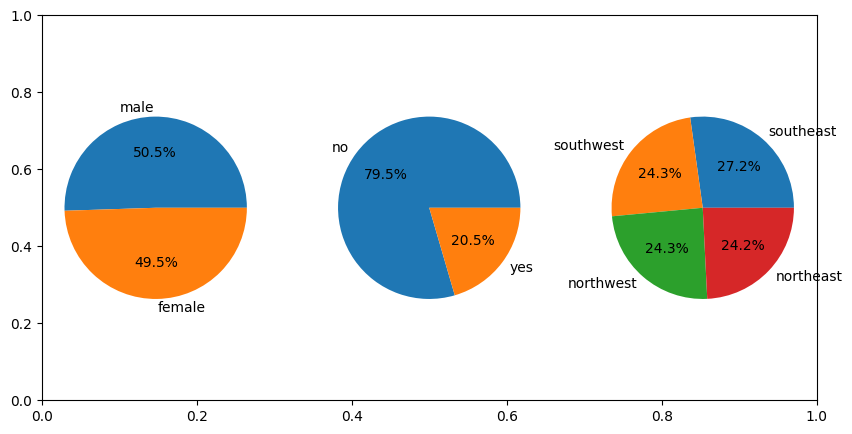

In [ ]:
import matplotlib.pyplot as plt
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(10, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()




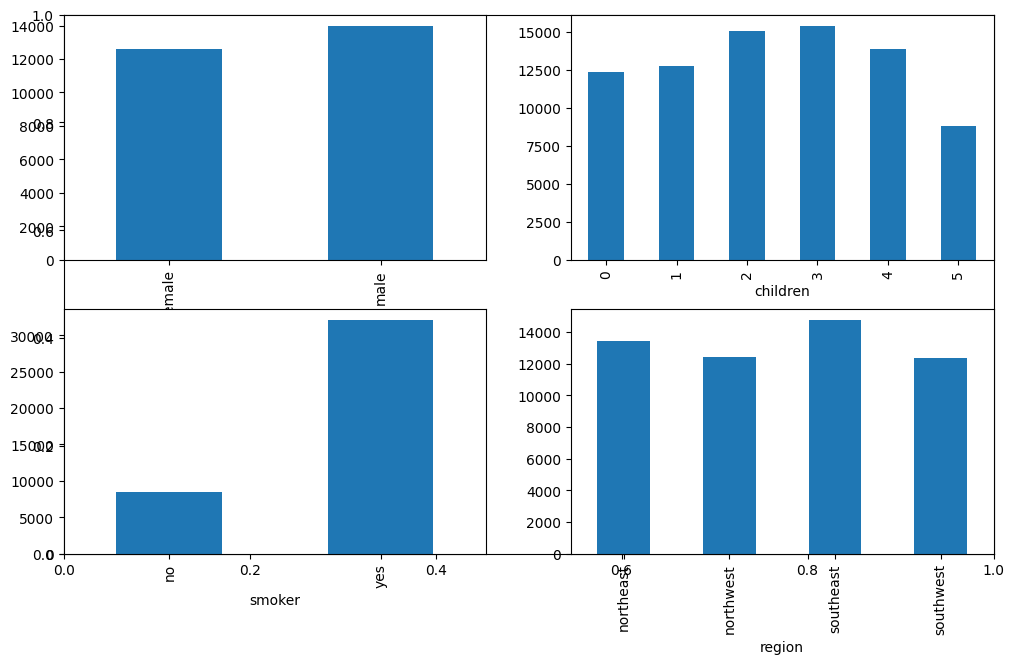

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(12, 7))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

# This code is modified by Susobhan Akhuli


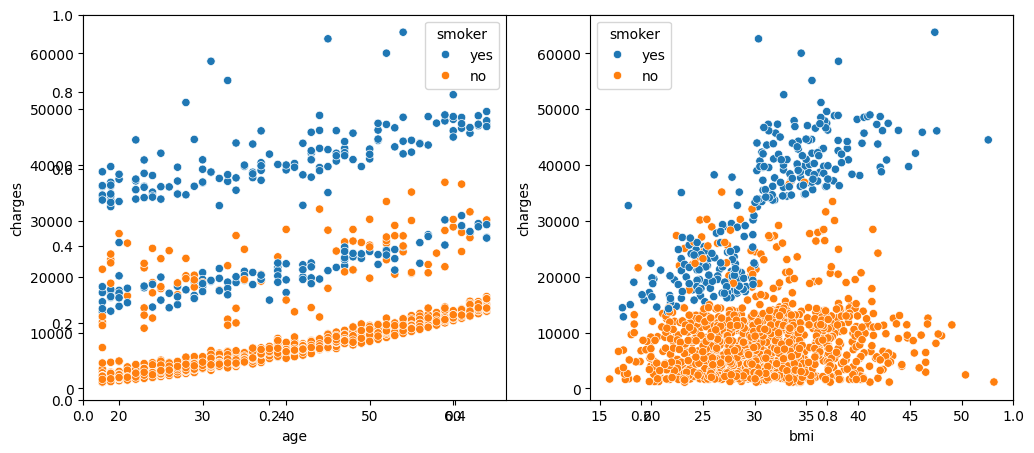

In [ ]:
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(12, 5))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

# This code is modified by Susobhan Akhuli


DATA PREPROCESSING :

<Axes: ylabel='age'>

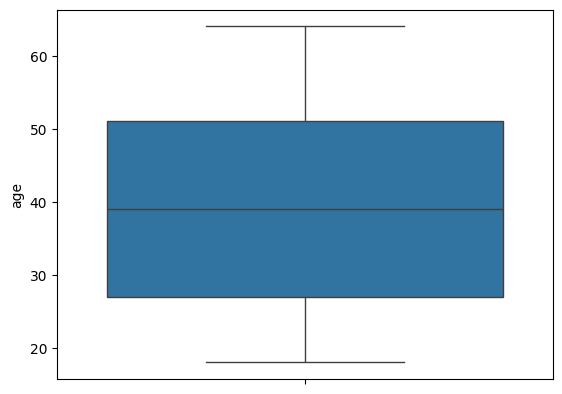

In [ ]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])


We can see that there are no outliers present in age column.

<Axes: ylabel='bmi'>

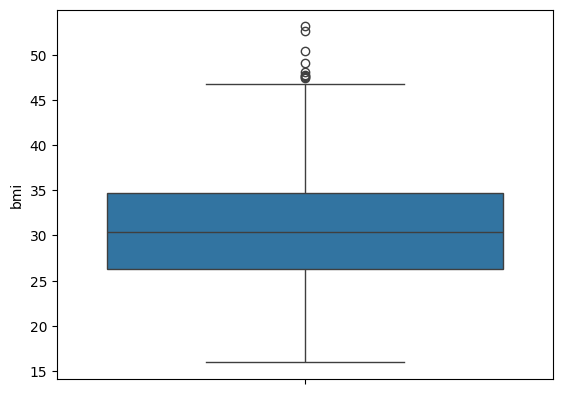

In [ ]:
sns.boxplot(df['bmi'])


In [ ]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


13.674999999999994
47.31500000000001


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.8 MB/s eta 0:00:00


<Axes: ylabel='bmi'>

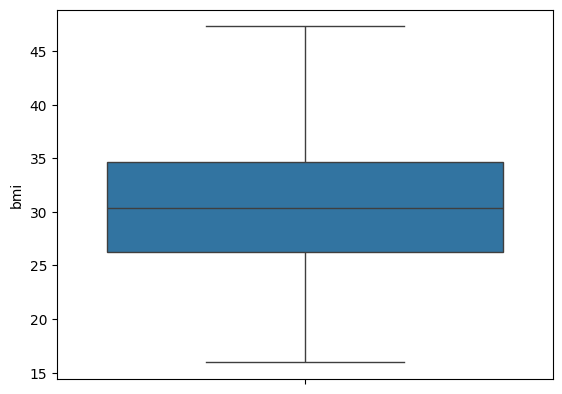

In [ ]:
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])




Now we successfully treated the outliers .

DATA WRANGLING :

In [ ]:
df['bmi'].skew()



np.float64(0.23289153320569975)

In [ ]:
df['age'].skew()

np.float64(0.054780773126998195)

Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

ENCODING :

In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [ ]:
df.corr()


,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


MODEL DEVELOPMENT :

In [ ]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
 df1

# This code is modified by Susobhan Akhuli


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())


0.7295415541376445
0.806239111557059
0.7470697972809902


In [ ]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())


-0.10151474302536445
-0.1344454720199666
-0.10374591327267262


In [ ]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())


0.9738163260247533
0.8819423353068565
0.8363637309718952
{'n_estimators': 120}
0.9746383984429655
0.8822009842175969
0.8367438097052858


In [ ]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())


0.9954123497009277
0.8548938035964966
0.8081253051757813
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.869317352771759
0.9022461175918579
0.8607115387916565


COMPARING ALL MODELS :







LINEAR REGRESSION

0.729

0.806

0.747







MODEL

Train Accuracy

Test Accuracy

CV Score









SUPPORT VECTOR MACHINE

-0.105

-0.134

0.103









RANDOM FOREST

0.974

0.882

0.836










GRADINT BOOST

0.868

0.901

0.860









XGBOOST

0.870

0.904

0.860

In [ ]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats


,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [ ]:
important_features=feats[feats['Importance']>0.01]
important_features


,Importance
age,0.038633
bmi,0.133449
children,0.011073
smoker,0.809626


FINAL MODEL :

In [ ]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())


0.8691051602363586
0.9007425308227539
0.8606266975402832


SAVE MODEL :

In [ ]:
import pickle as pkl
pkl.dump(finalmodel,open('MIPML.pkl','wb'))



PREDICT ON NEW DATA:

In [ ]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)


array([18035.828], dtype=float32)

CONCLUSION :


Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.




The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the real-life scenario. If we would have a bigger dataset then we will be able to learn even deeper patterns in the relation between the independent features and the premium charged from the buyers.